In [1]:
import os
print(os.listdir('D:/flowers-recognition/flowers/Training_Testing'))

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [2]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISY_DIR='D:/flowers-recognition/flowers/Training_Testing/daisy'
FLOWER_SUNFLOWER_DIR='D:/flowers-recognition/flowers/Training_Testing/sunflower'
FLOWER_TULIP_DIR='D:/flowers-recognition/flowers/Training_Testing/tulip'
FLOWER_DANDI_DIR='D:/flowers-recognition/flowers/Training_Testing/dandelion'
FLOWER_ROSE_DIR='D:/flowers-recognition/flowers/Training_Testing/rose'

In [3]:
def assign_label(img,flower_type):
    return flower_type

In [4]:
import cv2
import numpy as np
def make_train_data(flower_type,DIR):
    for img in os.listdir(DIR):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [5]:
make_train_data('daisy',FLOWER_DAISY_DIR)
print(len(X))

769


In [6]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

1503


In [7]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

2487


In [8]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

3271


In [9]:
make_train_data('dandelion',FLOWER_ROSE_DIR)
print(len(X))

4055


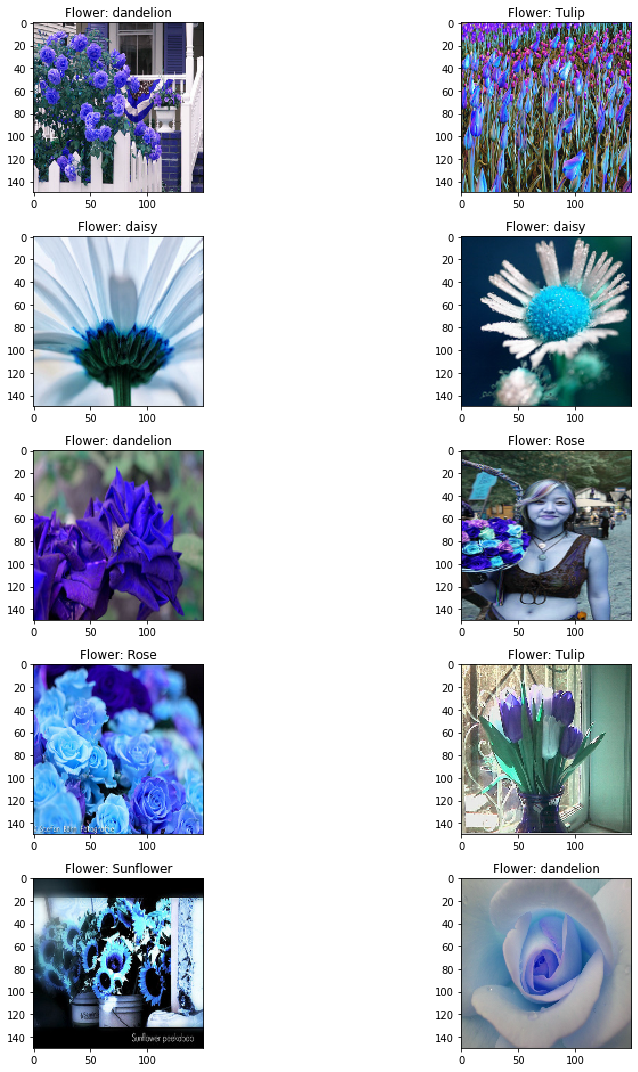

In [11]:
import matplotlib.pyplot as plt
import random as rn
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

Using TensorFlow backend.


In [13]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [14]:
import tensorflow as tf
import random as rn
np.random.seed(42)
rn.seed(42)
tf.compat.v2.random.set_seed
tf.random.set_seed(42)

In [15]:
# # modelling starts using a CNN.
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [16]:
batch_size=128
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [17]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [18]:
from keras.models import Sequential
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 96)       

In [20]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/50
23/23 [==============================] - 106s 5s/step - loss: 1.4994 - accuracy: 0.3035 - val_loss: 1.3789 - val_accuracy: 0.3748
Epoch 2/50
23/23 [==============================] - 87s 4s/step - loss: 1.2776 - accuracy: 0.4514 - val_loss: 1.1878 - val_accuracy: 0.5069
Epoch 3/50
23/23 [==============================] - 87s 4s/step - loss: 1.1688 - accuracy: 0.5015 - val_loss: 1.1496 - val_accuracy: 0.5256
Epoch 4/50
23/23 [==============================] - 85s 4s/step - loss: 1.1301 - accuracy: 0.5215 - val_loss: 1.1008 - val_accuracy: 0.5345
Epoch 5/50
23/23 [==============================] - 85s 4s/step - loss: 1.0937 - accuracy: 0.5312 - val_loss: 1.0436 - val_accuracy: 0.5592
Epoch 6/50
23/23 [==============================] - 82s 4s/step - loss: 1.0581 - accuracy: 0.5455 - val_loss: 1.0397 - val_accuracy: 0.5582
Epoch 7/50
23/23 [==============================] - 119s 5s/step - loss: 1.0310 - accuracy: 0.5557 - val_loss: 1.0331 - val_accuracy: 0.5513
Epoch 8/50
23/23 [

In [21]:
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

In [22]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

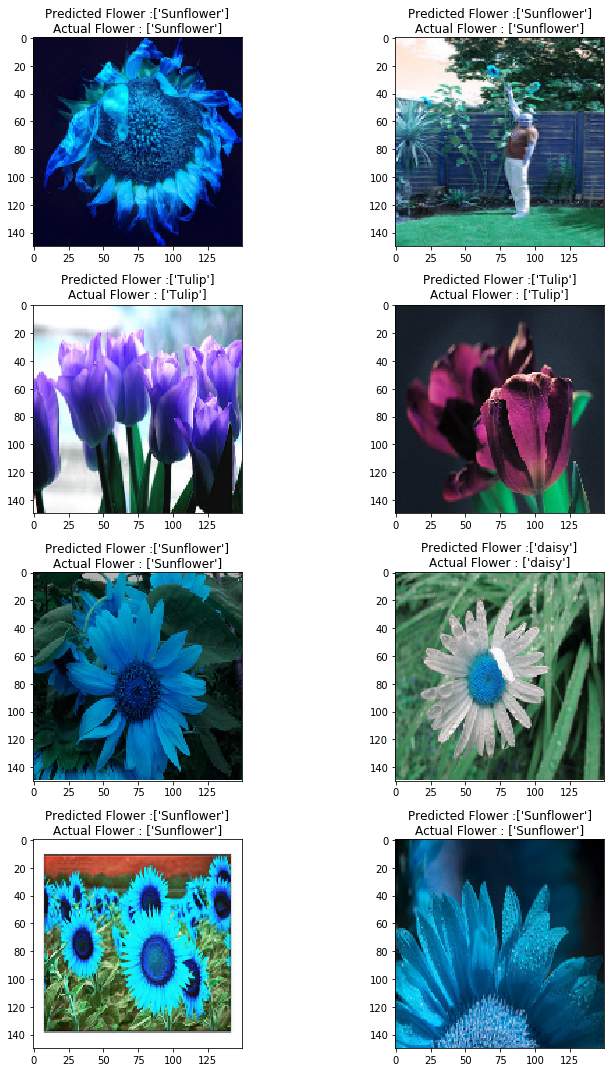

In [23]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Flower :"+str(le.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform([np.argmax(y_test[prop_class[count]])])))
        plt.tight_layout()
        count+=1

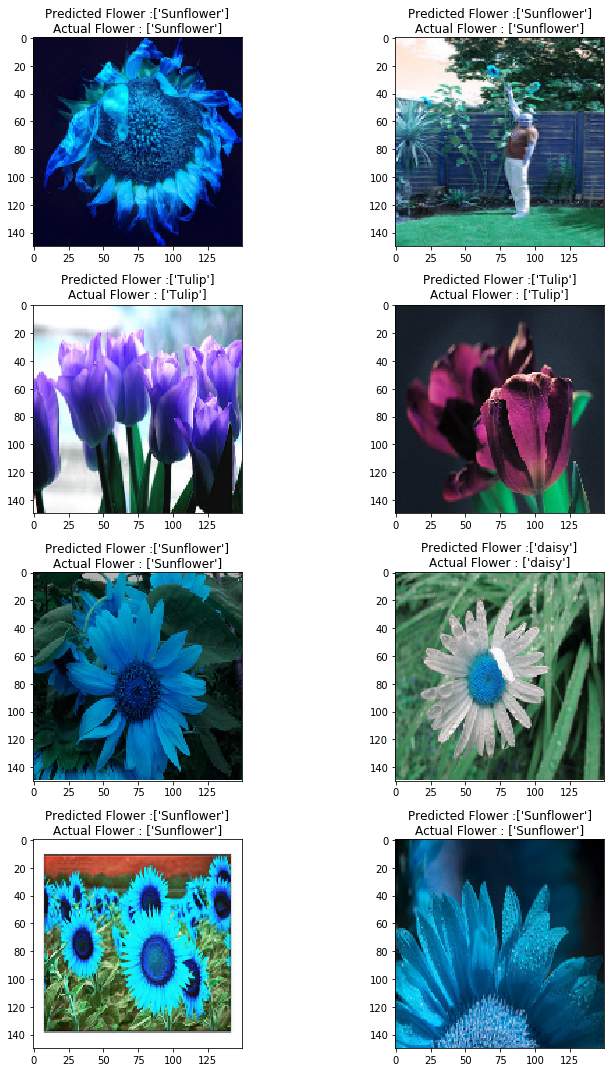

In [24]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Flower :"+str(le.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform([np.argmax(y_test[prop_class[count]])])))
        plt.tight_layout()
        count+=1